# The purpose of this project is to build a model that can predict if a player will be an NBA all-star

## 1.0 Import Libraries/Data

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
plt.style.use('classic')
from sklearn.model_selection import train_test_split
sns.set_style()
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



## 1.1 Import data

In [2]:
# Load in the Data
df = pd.read_csv('stats.csv',header = 1).drop(['RANK'],axis = 1)
df.columns = ['Name','Team','Position','Age','GP','MPG','MIN%','USG%','TO%','FTA','FT%','2PA','2P%','3PA','3P%','eFG%','TS%','PPG','RPG','TRB%','APG','AST%','SPG','BPG','TOPG','VI','ORTG','DRTG']

## 2.0 Preprocessing Data

In [3]:
df.sort_values(['PPG','APG'],ascending= False)
df.dropna(subset = ['ORTG','DRTG','eFG%','TO%','TS%'], inplace = True)

In [4]:
# List with all stars
all_stars =['Kevin Durant','Bradley Beal','Kyrie Irving','Kawhi Leonard','Jayson Tatum','Zion Williamson','Mike Conley','James Harden','Zach LaVine','Donovan Mitchell','Julius Randle','Nikola Vucevic','Devin Booker','Anthony Davis','Joel Embiid','LeBron James','Giannis Antetokounmpo','Stephen Curry','Luka Doncic','Nikola Jokic','Jaylen Brown','Paul George','Rudy Gobert','Damian Lillard','Domantas Sabonis','Chris Paul','Ben Simmons']
# Creating an All star Column
df['Allstar'] = df.apply(lambda x: x['Name'] in all_stars, axis = 1)
# Encoding target column, 1 = all star 0 = not
df['Allstar'] = df['Allstar'].astype(int)

## 3.0 Feature Engineering

# According to Mathletics
    
    4 Factors for Team offense are:
    * Effective Field Goal Percentage
    * Turnovers Committed per Possession 
    * Offensive Rebounding Percentage
    * Free Throw Rate
    
    4 Factors for Team Defense are:
    * Opponent's Effective Field Goal Percentage
    * Defensive Turnovers Cause per Possession
    * Defensive Rebounding Percentage
    * Openent's Free Throw Rate

### Free Throw percentage = Free Throws Made/Free Throws Attempted

### Free Throw Rate = Free Throws Made/Field Goal Attempts

### Field Goal Attempts = 2PA + 3PA

In [5]:
# Creating Field Goal Attempts, Free Throws Made, and Free Throw Rate Statistics. We will use FTR as a feature!
df['FGA'] = df['2PA'] + df['3PA']
df['FTM'] = (df['FT%']*df['FTA']).astype(int)
df['FTR'] = df['FTM']/df['FGA']

## 4.0 Train Test Split

In [6]:

# Initial Guess at most important features
X = df[['PPG','RPG','APG','eFG%','FTR','ORTG','DRTG']]
# Target Column is all star since that is what we want to predict
y = df['Allstar']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42,test_size = 0.3)


## 5.0 Modeling

We will implement a Random Forest Algorithm, Decision Tree Algorithm, and Naive Bayes Algorithm and select the model with the highest accuracy

In [7]:
# Random Forest Algorithm

clf=RandomForestClassifier(random_state = 40)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9710982658959537


In [8]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9479768786127167


In [9]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state = 40)
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9595375722543352


# The Random Forest Model performs the best with 97% Accuracy!

In [10]:
# Plot Feature Function to plot the most important features!
def plot_feature_importance(importance, names, model_type,topfeatures):
    
    # Arrays from feature importance and feature naes
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a DF using a dictionary

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    FI_df = pd.DataFrame(data)

    # Sort DF in terms of feature importance
    FI_df.sort_values(by = ['feature_importance'], ascending = False, inplace = True)
    
    # Font 
    font = {'fontname': 'Georgia'}
    
    
    
    #Plot Feature Importance Bar Chart
    plt.figure(figsize = (5,5))
    sns.barplot(x = FI_df['feature_importance'][:topfeatures], y = FI_df['feature_names'][:topfeatures])

    
    plt.title(model_type + ' Feature Importance',**font,fontsize = 20,fontweight="bold")
    plt.xlabel('Feature Importance',**font,fontsize = 15,fontweight="bold")
    plt.ylabel('Feature Names',**font,fontsize = 15,fontweight="bold")
    plt.xticks(**font)
    plt.yticks(**font)

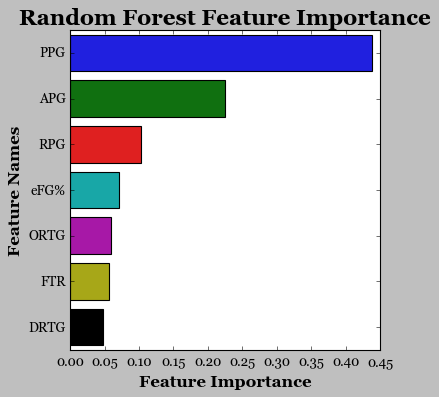

In [11]:
plot_feature_importance(clf.feature_importances_, X.columns, 'Random Forest',10)

### Here we can see that Points per game is the most important feature for predicting an All-Star

## 6.0 Cross Validation/Hyperparameter Tuning

In [12]:
# Parameters

# Trees 
n_estimators = [1,50,1000]
# Features to consider
max_features = ['auto', 'sqrt', 'log2', None]
# Bootstrap or not
bootstrap = [True, False]
# Random State
random_state = [1, 40, 500]

In [13]:
# Create a param grid
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,
             'random_state': random_state}
param_grid

{'n_estimators': [1, 50, 1000],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'bootstrap': [True, False],
 'random_state': [1, 40, 500]}

# 6.1 Grid Search CV

In [ ]:
grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

In [ ]:
grid.best_params_

In [ ]:
print('The Accuracy Score is: ' + str(accuracy_score(y_test,y_pred)))

## 7.0 Analysis

After using Grid Search CV for hyperparameter tuning, we achieved 97.7% Test Accuracy on predicting 2021 NBA All Stars. This model could be improved by adding more data prior to the 2021 NBA Season. But that is a project for another day.